In [1]:
# ! [ -e /content ] && pip install -Uqq fastbook

import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [7]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [16]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
print("len(threes):", len(threes))
print("len(sevens):", len(sevens))


len(threes): 6131
len(sevens): 6265


In [21]:
im3_path = threes[1]
im3 = Image.open(im3_path)
print("im3.shape:", im3.shape)

im3

im3.shape: (28, 28)


In [22]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [23]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [29]:
#hide_output
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[0:28, 0:28])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [32]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

three_tensors = [tensor(Image.open(o)) for o in threes]

len(seven_tensors), len(three_tensors)

(6265, 6131)

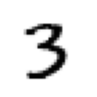

In [33]:
show_image(three_tensors[1]);

In [ ]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

# shape
stacked_threes.shape


torch.Size([6131, 28, 28])

In [37]:
# rank
len(stacked_threes.shape)
# rank
stacked_threes.ndim


3

torch.Size([28, 28])

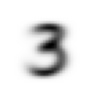

In [ ]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

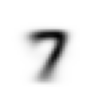

In [42]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

使用平均法求得3和7的tensor均值，得到一个[28, 28] 的矩阵。如何找最相近的？思考：
1. 矩阵作差取绝对值，将矩阵的模（如果有）设定个阈值，低于阈值就认为相似；
2. 矩阵转换为列向量list，对列向量求余弦相似度，低于某个阈值就认为相似；

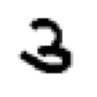

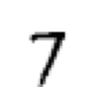

In [ ]:
# mean absolute difference or L1 norm
a_3 = stacked_threes[5]
show_image(a_3);

a_7 = stacked_sevens[5]

show_image(a_7);

In [52]:
# L1 norm
dist_3_abs = (mean3 - a_3).abs().mean()
dist_7_abs = (mean7 - a_7).abs().mean()

dist_3_abs, dist_7_abs

(tensor(0.1700), tensor(0.0823))

In [53]:
# L2 norm
dist_3_sqr = (mean3 - a_3).pow(2).mean().sqrt()
dist_7_sqr = (mean7 - a_7).pow(2).mean().sqrt()

dist_3_sqr, dist_7_sqr

(tensor(0.3016), tensor(0.1562))

In [54]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.2198), tensor(0.3829))